# Problem Statement
**Phishing is a form of fraud in which the attacker tries to learn sensitive information such as login credentials or account information by sending as a reputable entity or person in email or other communication channels.**
Typically a victim receives a message that appears to have been sent by a known contact or organization. The message contains malicious software targeting the user’s computer or has links to direct victims to malicious websites in order to trick them into divulging personal and financial information, such as passwords, account IDs or credit card details.

In this notebook we will see what all features can we derive and use from the domain/URL of a website to detect whether it is phishing or not. First of all let us understand the breakdown of a URL.

# Domain Analysis

**URL components** <br>
Uniform Resource Locator (URL) is created to address web pages. The figure below shows relevant parts in the structure of a typical URL.

<img src='https://miro.medium.com/max/1400/1*mPoNQ5LUkuOTog1dUb1EFw.png' width=600></img>

A phisher has full control over the subdomain portions and can set any value to it. The URL may also have a path and file components which, too, can be changed by the phisher at will. The subdomain name and path are fully controllable by the phisher. We use the term FreeURL to refer to those parts of the URL in the rest of the article.<br>
The attacker can register any domain name that has not been registered before. This part of URL can be set only once. The phisher can change FreeURL at any time to create a new URL. The reason security defenders struggle to detect phishing domains is because of the unique part of the website domain (the FreeURL). When a domain detected as a fraudulent, it is easy to prevent this domain before an user access to it.

# Dataset description

There are 4 types of features that we can extract from the URL.
- Address Bar based Features
- Abnormal Based Features
- HTML and JavaScript based Features
- Domain based Features

### Address Bar based Features
1. **Using the IP Address**<br>
If an IP address is used as an alternative of the domain name in the URL, such as “http://125.98.3.123/fake.html”, users can be sure that someone is trying to steal their personal information. Sometimes, the IP address is even transformed into hexadecimal code as shown in the following link “http://0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html”.
> RULE: IF <br>
{If The Domain Part has an IP Address → Phishing<br>
{Otherwise→ Legitimate

2. **Long URL to Hide the Suspicious Part**<br>
Phishers can use long URL to hide the doubtful part in the address bar. For example: 
http://federmacedoadv.com.br/3f/aze/ab51e2e319e51502f416dbe46b773a5e/?cmd=_home&amp;dispatch=11004d58f5b74f8dc1e7c2e8dd4105e811004d58f5b74f8dc1e7c2e8dd4105e8@phishing.website.html
To ensure accuracy of our study, we calculated the length of URLs in the dataset and produced an average URL length. The results showed that if the length of the URL is greater than or equal 54 characters then the URL classified as phishing. By reviewing our dataset we were able to find 1220 URLs lengths equals to 54 or more which constitute 48.8% of the total dataset size. We have been able to update this feature rule by using a method based on frequency and thus improving upon its accuracy.
> RULE: IF<br>
{URL length<54 → feature = Legitimate<br>
{else if URL length≥54 and ≤75 → feature = Suspicious<br>
{otherwise→ feature = Phishing

3. **Using URL Shortening Services “TinyURL”**<br>
URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL. For example, the URL “http://portal.hud.ac.uk/” can be shortened to “bit.ly/19DXSk4”.
> RULE: IF<br>
{TinyURL → Phishing<br>
{Otherwise→ Legitimate

4. **URL’s having “@” Symbol**<br>
Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.
>RULE: IF<br>
{Url Having @ Symbol→ Phishing<br>
{Otherwise→ Legitimate

5. **Redirecting using “//”**<br>
The existence of “//” within the URL path means that the user will be redirected to another website. An example of such URL’s is: “http://www.legitimate.com//http://www.phishing.com”. We examin the location where the “//” appears. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position.
>RULE: IF<br>
{The Position of the Last Occurrence of "//\" " in the URL > 7→ Phishing<br>
{Otherwise→ Legitimate

6. **Adding Prefix or Suffix Separated by (-) to the Domain**<br>
The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage. For example http://www.Confirme-paypal.com/.
>RULE: IF<br>
{Domain Name Part Includes (-) Symbol → Phishing<br>
{Otherwise → Legitimate

7. **Sub Domain and Multi Sub Domains**<br>
Let us assume we have the following link: http://www.hud.ac.uk/students/. A domain name might include the country-code top-level domains (ccTLD), which in our example is “uk”. The “ac” part is shorthand for “academic”, the combined “ac.uk” is called a second-level domain (SLD) and “hud” is the actual name of the domain. To produce a rule for extracting this feature, we firstly have to omit the (www.) from the URL which is in fact a sub domain in itself. Then, we have to remove the (ccTLD) if it exists. Finally, we count the remaining dots. If the number of dots is greater than one, then the URL is classified as “Suspicious” since it has one sub domain. However, if the dots are greater than two, it is classified as “Phishing” since it will have multiple sub domains. Otherwise, if the URL has no sub domains, we will assign “Legitimate” to the feature.
> RULE: IF<br>
{Dots In Domain Part=1 → Legitimate<br>
{Dots In Domain Part=2 → Suspicious<br>
{Otherwise→ Phishing

8. **HTTPS (Hyper Text Transfer Protocol with Secure Sockets Layer)**<br>
The existence of HTTPS is very important in giving the impression of website legitimacy, but this is clearly not enough. The authors in (Mohammad, Thabtah and McCluskey 2012) (Mohammad, Thabtah and McCluskey 2013) suggest checking the certificate assigned with HTTPS including the extent of the trust certificate issuer, and the certificate age. Certificate Authorities that are consistently listed among the top trustworthy names include: “GeoTrust, GoDaddy, Network Solutions, Thawte, Comodo, Doster and VeriSign”. Furthermore, by testing out our datasets, we find that the minimum age of a reputable certificate is two years.
>RULE: IF<br>
{Use https and Issuer Is Trusted &and Age of Certificate≥ 1 Years → Legitimate<br>
{Using https and Issuer Is Not Trusted  → Suspicious<br>
{Otherwise→ Phishing

9. **Domain Registration Length**<br>
Based on the fact that a phishing website lives for a short period of time, we believe that trustworthy domains are regularly paid for several years in advance. In our dataset, we find that the longest fraudulent domains have been used for one year only.
>RULE: IF<br>
{Domains Expires on≤ 1 years → Phishing<br>
{Otherwise→ Legitimate

10. **Favicon**<br>
A favicon is a graphic image (icon) associated with a specific webpage. Many existing user agents such as graphical browsers and newsreaders show favicon as a visual reminder of the website identity in the address bar. If the favicon is loaded from a domain other than that shown in the address bar, then the webpage is likely to be considered a Phishing attempt.
>RULE: IF<br>
{Favicon Loaded From External Domain→ Phishing<br>
{Otherwise→ Legitimate

11. **Using Non-Standard Port**<br>
This feature is useful in validating if a particular service (e.g. HTTP) is up or down on a specific server. In the aim of controlling intrusions, it is much better to merely open ports that you need. Several firewalls, Proxy and Network Address Translation (NAT) servers will, by default, block all or most of the ports and only open the ones selected. If all ports are open, phishers can run almost any service they want and as a result, user information is threatened.
>RULE: IF<br>
{"Port # is of the " Preffered Status→ Phishing<br>
{Otherwise→ Legitimate

12. **The Existence of “HTTPS” Token in the Domain Part of the URL**<br>
The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users. For example,
http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/.
>RULE: IF<br>
{"Using " HTTP Token in Domain Part of The URL→ Phishing<br>
{Otherwise→ Legitimate


### Abnormal Based Features
1. **Request URL**<br>
Request URL examines whether the external objects contained within a webpage such as images, videos and sounds are loaded from another domain. In legitimate webpages, the webpage address and most of objects embedded within the webpage are sharing the same domain. 
>Rule: IF<br>
{% of Request URL <22% → Legitimate<br>
{%of Request URL≥22% and 61%→ Suspicious<br>
{Otherwise→ feature=Phishing

2. **URL of Anchor**<br>
An anchor is an element defined by the ```<a>``` tag. This feature is treated exactly as “Request URL”. However, for this feature we examine:
	If the ```<a>``` tags and the website have different domain names. This is similar to request URL feature. 
	If the anchor does not link to any webpage, e.g.:<br>
	```<a href=“#”>```<br>
	```<a href=“#content”>```<br>
	```<a href=“#skip”>```<br>
	```<a href=“JavaScript ::void(0)”>```<br>
>Rule:  IF<br>
{% of URL Of Anchor <31%  → Legitimate<br>
{% of URL Of Anchor ≥31% and ≤67% → Suspicious<br> 
{Otherwise→ Phishing

3. **Links in ```<Meta>, <Script>``` and ```<Link>``` tags**<br>
Given that our investigation covers all angles likely to be used in the webpage source code, we find that it is common for legitimate websites to use ```<Meta>``` tags to offer metadata about the HTML document; ```<Script>``` tags to create a client side script; and ```<Link>``` tags to retrieve other web resources. It is expected that these tags are linked to the same domain of the webpage. 
>Rule: IF<br>
{% of Links in ```<Meta>```,```<Script>``` and ```<Link>```<17%  → Legitimate<br>
{% of Links in ```<Meta>```,```<Script>``` and ```<Link>``` ≥17% And≤81% → Suspicious<br>
{Otherwise→ Phishing

4. **Server Form Handler (SFH)**<br>
SFHs that contain an empty string or “about:blank” are considered doubtful because an action should be taken upon the submitted information. In addition, if the domain name in SFHs is different from the domain name of the webpage, this reveals that the webpage is suspicious because the submitted information is rarely handled by external domains. 
>Rule: IF<br>
{SFH is ""about: blank\"" Or Is Empty → Phishing<br>
{SFH "Refers To " A Different Domain→ Suspicious<br>
{Otherwise  → Legitimate

5. **Submitting Information to Email**<br>
Web form allows a user to submit his personal information that is directed to a server for processing. A phisher might redirect the user’s information to his personal email. To that end, a server-side script language might be used such as “mail()” function in PHP. One more client-side function that might be used for this purpose is the “mailto:” function. 
>Rule: IF<br>
{Using ""mail()\" or \"mailto:\" Function to Submit User Information" → Phishing<br>
{Otherwise  → Legitimate

6. **Abnormal URL**<br>
This feature can be extracted from WHOIS database. For a legitimate website, identity is typically part of its URL. 
>Rule: IF<br>
{The Host Name Is Not Included In URL → Phishing<br>
{Otherwise→ Legitimate
    
### HTML and JavaScript based Features
1. **Website Forwarding**
The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times. 
>Rule: IF<br> 
{Number of Redirect Page ≤ 1 → Legitimate<br>
{Number of Redirect Page ≥ 2 And < 4 → Suspicious<br>
{Otherwise → Phishing

2. **Status Bar Customization**
Phishers may use JavaScript to show a fake URL in the status bar to users. To extract this feature, we must dig-out the webpage source code, particularly the “onMouseOver” event, and check if it makes any changes on the status bar. 
>Rule: IF<br>
{onMouseOver Changes Status Bar→ Phishing<br>
{It Does't Change Status Bar → Legitimate

3. **Disabling Right Click**
Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code. This feature is treated exactly as “Using onMouseOver to hide the Link”. Nonetheless, for this feature, we will search for event “event.button==2” in the webpage source code and check if the right click is disabled. 
>Rule: IF<br>
{Right Click Disabled → Phishing<br>
{Otherwise → Legitimate

4. **Using Pop-up Window**
It is unusual to find a legitimate website asking users to submit their personal information through a pop-up window. On the other hand, this feature has been used in some legitimate websites and its main goal is to warn users about fraudulent activities or broadcast a welcome announcement, though no personal information was asked to be filled in through these pop-up windows.
>Rule: IF<br> 
{Popoup Window Contains Text Fields → Phishing<br>
{Otherwise → Legitimate

5. **IFrame Redirection**
IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation. 
>Rule: IF<br>
{Using iframe → Phishing<br>
{Otherwise → Legitimate

### Domain based Features
1. **Age of Domain**<br>
This feature can be extracted from WHOIS database (Whois 2005). Most phishing websites live for a short period of time. By reviewing our dataset, we find that the minimum age of the legitimate domain is 6 months. 
>Rule: IF<br>
{Age Of Domain≥6 months → Legitimate<br>
{Otherwise → Phishing

2. **DNS Record**<br>
For phishing websites, either the claimed identity is not recognized by the WHOIS database (Whois 2005) or no records founded for the hostname (Pan and Ding 2006). If the DNS record is empty or not found then the website is classified as “Phishing”, otherwise it is classified as “Legitimate”. 
>Rule: IF<br>
{no DNS Record For The Domain → Phishing<br>
{Otherwise → Legitimate

3. **Website Traffic**<br>
This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit. However, since phishing websites live for a short period of time, they may not be recognized by the Alexa database (Alexa the Web Information Company., 1996). By reviewing our dataset, we find that in worst scenarios, legitimate websites ranked among the top 100,000. Furthermore, if the domain has no traffic or is not recognized by the Alexa database, it is classified as “Phishing”. Otherwise, it is classified as “Suspicious”. 
>Rule: IF<br>
{Website Rank<100,000 → Legitimate<br>
{Website Rank>100,000 → Suspicious<br>
{Otherwise → Phishing
	
4. **PageRank**<br>
PageRank is a value ranging from “0” to “1”. PageRank aims to measure how important a webpage is on the Internet. The greater the PageRank value the more important the webpage. In our datasets, we find that about 95% of phishing webpages have no PageRank. Moreover, we find that the remaining 5% of phishing webpages may reach a PageRank value up to “0.2”. 
>Rule: IF<br>
{PageRank<0.2 → Phishing<br>
{Otherwise → Legitimate
	
5. **Google Index**<br>
This feature examines whether a website is in Google’s index or not. When a site is indexed by Google, it is displayed on search results (Webmaster resources, 2014). Usually, phishing webpages are merely accessible for a short period and as a result, many phishing webpages may not be found on the Google index. 
>Rule: IF<br>
{Webpage Indexed by Google → Legitimate<br>
{Otherwise → Phishing
	
6. **Number of Links Pointing to Page**<br>
The number of links pointing to the webpage indicates its legitimacy level, even if some links are of the same domain (Dean, 2014). In our datasets and due to its short life span, we find that 98% of phishing dataset items have no links pointing to them. On the other hand, legitimate websites have at least 2 external links pointing to them. 
>Rule: IF<br>
{Number Of Link Pointing to The Webpage=0 → Phishing<br>
{Number Of Link Pointing to The Webpage>0 and ≤ 2 → Suspicious<br>
{Otherwise → Legitimate

7. **Statistical-Reports Based Feature**<br>
Several parties such as PhishTank (PhishTank Stats, 2010-2012), and StopBadware (StopBadware, 2010-2012) formulate numerous statistical reports on phishing websites at every given period of time; some are monthly and others are quarterly. In our research, we used 2 forms of the top ten statistics from PhishTank: “Top 10 Domains” and “Top 10 IPs” according to statistical-reports published in the last three years, starting in January2010 to November 2012. Whereas for “StopBadware”, we used “Top 50” IP addresses.
>Rule: IF<br>
{Host Belongs to Top Phishing IPs or Top Phishing Domains → Phishing<br>
{Otherwise → Legitimate


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('../input/phishing-website-dataset/dataset.csv')

# Data Overview

In [3]:
# First 5 sample rows of Dataset
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
# Name of columns
list(df.columns)

['index',
 'having_IPhaving_IP_Address',
 'URLURL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report',
 'Result']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

You can see that there are no missing values in the Dataset

In [6]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

index has 11055 unique values
having_IPhaving_IP_Address contains:			[-1  1]
URLURL_Length contains:			[ 1  0 -1]
Shortining_Service contains:			[ 1 -1]
having_At_Symbol contains:			[ 1 -1]
double_slash_redirecting contains:			[-1  1]
Prefix_Suffix contains:			[-1  1]
having_Sub_Domain contains:			[-1  0  1]
SSLfinal_State contains:			[-1  1  0]
Domain_registeration_length contains:			[-1  1]
Favicon contains:			[ 1 -1]
port contains:			[ 1 -1]
HTTPS_token contains:			[-1  1]
Request_URL contains:			[ 1 -1]
URL_of_Anchor contains:			[-1  0  1]
Links_in_tags contains:			[ 1 -1  0]
SFH contains:			[-1  1  0]
Submitting_to_email contains:			[-1  1]
Abnormal_URL contains:			[-1  1]
Redirect contains:			[0 1]
on_mouseover contains:			[ 1 -1]
RightClick contains:			[ 1 -1]
popUpWidnow contains:			[ 1 -1]
Iframe contains:			[ 1 -1]
age_of_domain contains:			[-1  1]
DNSRecord contains:			[-1  1]
web_traffic contains:			[-1  0  1]
Page_Rank contains:			[-1  1]
Google_Index contains:			[ 1 -1]
L

According to the Data descrition, these are the meaning of the values in the data
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

# EDA 📈📊📉

Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling

In [7]:
df = df.drop(columns=['index'])

 1    6157
-1    4898
Name: Result, dtype: int64


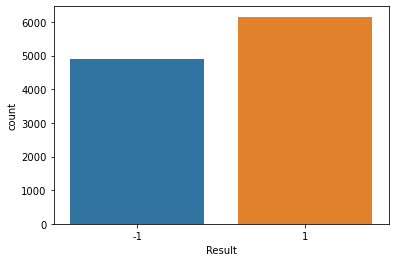

In [8]:
print(df['Result'].value_counts())
sns.countplot(df['Result'])

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

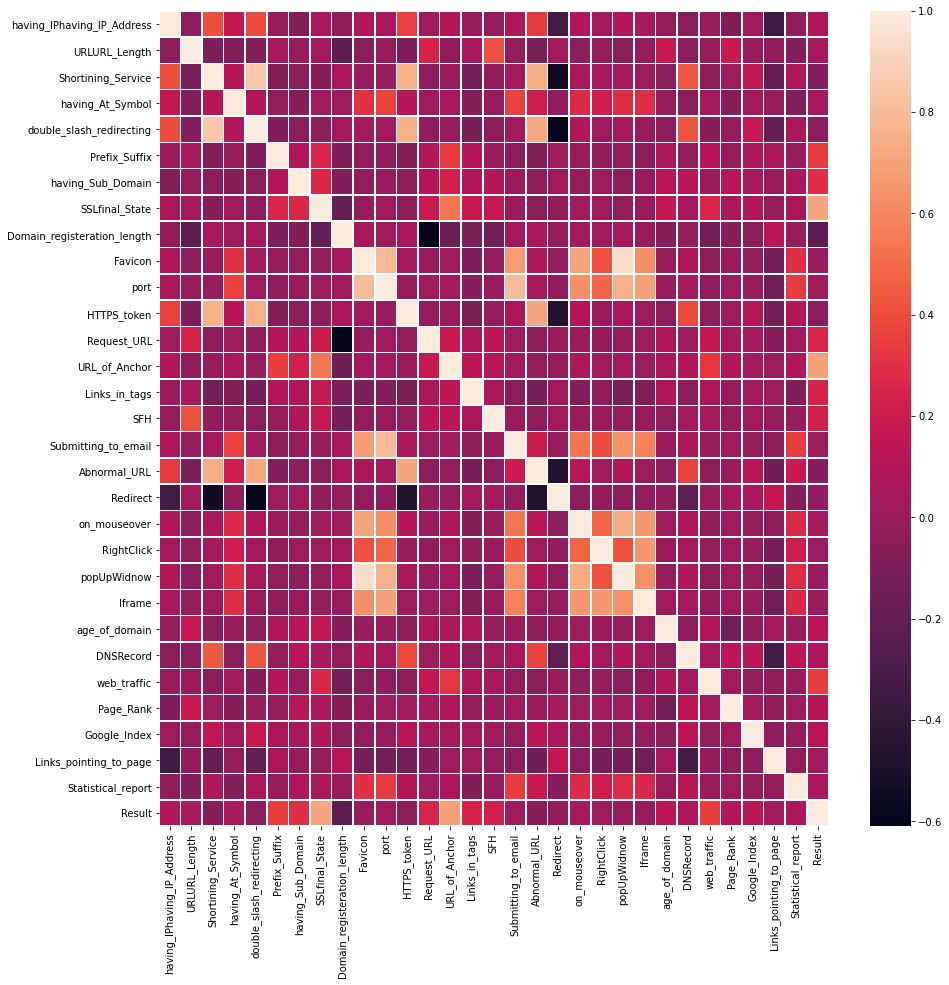

In [9]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

Note that feature `popUpWindow` and `favicon` are highly correlated. Looking at the definitions of these features from the Data description, we can say that, for websites where favicon is loaded from external links the pop-up window mostly contains text field. This is said just by seeing the high correlation. Dropping one of the features or not is an experimental decision.

Note that some features are negatively correlated but the color index minimum correlation is upto -0.6. Negative correlations are where one feature marks it as phishing and other don't.

# MODELLING 💇‍♀️

We will be using a simple tree based classifier and no hyper-parameter tuning to model and test our dataset. Note that we replace -1 with 0 and 0 marks phishing website.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def binary_classification_accuracy(actual, pred):
    
    print(f'Confusion matrix: \n{confusion_matrix(actual, pred)}')
    print(f'Accuracy score: \n{accuracy_score(actual, pred)}')
    print(f'Classification report: \n{classification_report(actual, pred)}')

In [12]:
# Replacing -1 with 0 in the target variable
df['Result'] = np.where(df['Result']==-1, 0, df['Result'])
target = df['Result']
features = df.drop(columns=['Result'])

In [13]:
folds = KFold(n_splits=4, shuffle=True, random_state=42)

train_index_list = list()
validation_index_list = list()

for fold, (train_idx, validation_idx) in enumerate(folds.split(features, target)):
    
    model = XGBClassifier()
    model.fit(np.array(features)[train_idx,:], np.array(target)[train_idx])
    predicted_values = model.predict(np.array(features)[validation_idx,:])
    print(f'==== FOLD {fold+1} ====')
    binary_classification_accuracy(np.array(target)[validation_idx], predicted_values)

==== FOLD 1 ====
Confusion matrix: 
[[1131   52]
 [  32 1549]]
Accuracy score: 
0.9696092619392185
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1183
           1       0.97      0.98      0.97      1581

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764

==== FOLD 2 ====
Confusion matrix: 
[[1174   42]
 [  36 1512]]
Accuracy score: 
0.9717800289435601
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1216
           1       0.97      0.98      0.97      1548

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764

==== FOLD 3 ====
Confusion matrix: 
[[1209   43]
 [  36 1476]]
Accuracy score: 
0.9714182344428365
C

More EDA, Hyperparameter tuning, modelling and ensemble techniques are going to be updated in this kernel. Stay tuned.
> ### DONT FORGET TO UPVOTE IF YOU LIKED IT 😊
Visit my blog akashnotes.com for more data science related blogs.